In [1]:
import pandas as pd
import numpy as np

In [2]:
new_df = pd.read_csv('liwc_final_question_type.csv')

In [3]:
new_df.drop(897,axis=0,inplace=True)

In [8]:
p = pd.read_csv('personality_ocean.csv')
a= list(p.columns[-5:])
a.append('person_id')

a.append('Gender_Male')

In [9]:
p2=p[a]

In [10]:
new_df  = pd.merge(new_df,p2,how='left',on='person_id')

In [7]:
# tfidf = pd.read_csv('tfidf_features.csv')
pos = pd.read_csv('POSfeatures.csv')

In [8]:
# df_train = pd.read_hdf('tfidf_dataset_split/tfidf_features_train.d5','data')
# df_test = pd.read_hdf('tfidf_dataset_split/tfidf_features_test.d5','data')

In [9]:
new_df.question.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '3', '4', '5',
       '6', '7', '8', '9', 'D_1', 'D_2'], dtype=object)

In [10]:

tfidf =pd.read_csv('tfidf_features_full.csv')

In [11]:
# personality = pd.read_csv('personality_y.csv')

In [12]:
tfidf = tfidf.add_prefix('tfidf_')

In [13]:
tfidf.columns

Index(['tfidf_00', 'tfidf_00 00', 'tfidf_00 00 work', 'tfidf_00 000',
       'tfidf_00 000 subscribers', 'tfidf_00 night',
       'tfidf_00 night iterations', 'tfidf_00 standard',
       'tfidf_00 standard ve', 'tfidf_00 work',
       ...
       'tfidf_zero percent', 'tfidf_zero percent signs', 'tfidf_zeros',
       'tfidf_zeros database', 'tfidf_zeros database actually', 'tfidf_zolot',
       'tfidf_zolot anna', 'tfidf_zolot anna solar', 'tfidf_zone',
       'tfidf_zone knowledge'],
      dtype='object', length=42662)

In [14]:
new_df  = pd.concat([pos,tfidf,new_df], axis=1)

In [15]:
# new_df.drop(['y'],axis=1,inplace=True)

In [16]:
new_df.drop(['third_tag'],inplace=True,axis=1)

In [17]:
new_df.drop(['count_capitals', 'count_NNPS', 'count_SYM', 'first_word_is_she', 'first_word_is_you', 'first_word_is_OK'],inplace=True,axis=1)


In [18]:
# new_df.drop(['y'],inplace=True,axis=1)


In [19]:
new_df['y']

,y,y
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
892,0.0,0.0
893,0.0,0.0
894,0.0,0.0
895,0.0,0.0


In [20]:
# personality.iloc[:,2:]=personality.iloc[:,2:].astype('category')

In [21]:
# personality

In [22]:
# new_df = pd.merge(new_df,personality,how='left',on='person_id')

In [23]:
# for i in new_df.columns:
#     print(i)

In [24]:
import random
random.seed(0)
samples= list(new_df.person_id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.8*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(new_df[new_df['person_id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(new_df[new_df['person_id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']

In [25]:
new_df['affect']

0       2.54
1       3.19
2      10.53
3       5.15
4       9.43
       ...  
892     0.00
893    18.18
894     0.00
895     0.00
896     4.17
Name: affect, Length: 897, dtype: float64

In [26]:
df_train.person_id.unique()

array([28., 13., 25., 14.,  2.,  9., 17., 16., 30., 10., 24., 12., 19.,
        7., 29.,  5., 21.,  3., 23., 27., 22., 15., 26., 31.,  8.])

In [27]:
df_test.person_id.unique()

array([ 1.,  4.,  6., 11., 18., 20.])

In [28]:
for i in X_train.columns:
    print(i)

seq_01
seq_02
seq_03
lexical_diversity
get_consonant_letters
get_sonant_letters
count_of_fillers
count_of_other_fillers
count_of_spaces
count_nouns
count_adjectives
count_numbers
count_NNS
count_NNP
count_RBS
count_RBR
count_WP
count_WP$
count_WRB
count_PRP
count_POS
count_FW
count_VB
count_VBD
count_VBG
count_VBN
count_CC
count_DT
count_UH
count_PDT
count_LS
count_3rd person
count_gerund
is_past_tense
is_modal
vocab_richness
first_tag
second_tag
exists_she
exists_he
first_word_is_the
first_word_is_he
first_word_is_it
first_word_is_this
id
tfidf_00
tfidf_00 00
tfidf_00 00 work
tfidf_00 000
tfidf_00 000 subscribers
tfidf_00 night
tfidf_00 night iterations
tfidf_00 standard
tfidf_00 standard ve
tfidf_00 work
tfidf_00 work schedule
tfidf_000
tfidf_000 subscribers
tfidf_000 subscribers youtube
tfidf_10
tfidf_10 10
tfidf_10 10 help
tfidf_10 cheating
tfidf_10 cheating mean
tfidf_10 got
tfidf_10 got interested
tfidf_10 help
tfidf_10 help starting
tfidf_10 million
tfidf_10 million downloads
tf

tfidf_books incoming
tfidf_books incoming painting
tfidf_books introduced
tfidf_books introduced initial
tfidf_books like
tfidf_books like child
tfidf_books like really
tfidf_books like secondly
tfidf_books manage
tfidf_books manage slides
tfidf_books mother
tfidf_books mother great
tfidf_books normal
tfidf_books normal difficult
tfidf_books oh
tfidf_books oh want
tfidf_books order
tfidf_books order like
tfidf_books people
tfidf_books people wanted
tfidf_books quick
tfidf_books quick manner
tfidf_books read
tfidf_books read fiction
tfidf_books read lot
tfidf_books really
tfidf_books really enjoyed
tfidf_books recently
tfidf_books recently ve
tfidf_books recommended
tfidf_books recommended goes
tfidf_books related
tfidf_books related book
tfidf_books right
tfidf_books right book
tfidf_books seen
tfidf_books seen people
tfidf_books self
tfidf_books self help
tfidf_books solve
tfidf_books solve puzzles
tfidf_books statistics
tfidf_books statistics planning
tfidf_books studious
tfidf_books

tfidf_cricket like choose
tfidf_cricket like diehard
tfidf_cricket like foreigner
tfidf_cricket like indoor
tfidf_cricket major
tfidf_cricket major hobby
tfidf_cricket society
tfidf_cricket society playing
tfidf_cricket ve
tfidf_cricket ve started
tfidf_crime
tfidf_crime greek
tfidf_crime greek know
tfidf_crime trevor
tfidf_crime trevor noah
tfidf_criteria
tfidf_criteria admit
tfidf_criticised
tfidf_criticised students
tfidf_criticised students cheat
tfidf_criticize
tfidf_criticize lucrative
tfidf_criticize lucrative career
tfidf_cross
tfidf_cross functional
tfidf_cross functional abilities
tfidf_crowd
tfidf_crowd good
tfidf_crowd good thing
tfidf_crowd talking
tfidf_crowd talking lot
tfidf_crunching
tfidf_crunching like
tfidf_crunching like analyzing
tfidf_cryptocurrency
tfidf_cryptocurrency stuff
tfidf_cryptocurrency stuff read
tfidf_cs
tfidf_cs coding
tfidf_cs coding tried
tfidf_cs courses
tfidf_cs courses running
tfidf_cs seeing
tfidf_cs seeing benefit
tfidf_csr
tfidf_csr funding
t

tfidf_field currently
tfidf_field currently masters
tfidf_field data
tfidf_field data analytics
tfidf_field decide
tfidf_field decide speciality
tfidf_field different
tfidf_field different perspective
tfidf_field emerging
tfidf_field emerging things
tfidf_field emission
tfidf_field emission control
tfidf_field ensure
tfidf_field ensure submitted
tfidf_field event
tfidf_field event developed
tfidf_field expertise
tfidf_field expertise despite
tfidf_field farce
tfidf_field farce like
tfidf_field fodder
tfidf_field fodder tier
tfidf_field forward
tfidf_field forward like
tfidf_field future
tfidf_field future course
tfidf_field general
tfidf_field general want
tfidf_field good
tfidf_field good like
tfidf_field got
tfidf_field got know
tfidf_field great
tfidf_field great thing
tfidf_field help
tfidf_field help able
tfidf_field high
tfidf_field high actually
tfidf_field hopefully
tfidf_field hopefully able
tfidf_field important
tfidf_field important wear
tfidf_field include
tfidf_field inclu

tfidf_include know
tfidf_include know rolling
tfidf_include photography
tfidf_include photography good
tfidf_include swimming
tfidf_include swimming enable
tfidf_including
tfidf_including delicious
tfidf_including delicious learned
tfidf_income
tfidf_income interests
tfidf_income interests mean
tfidf_incomers
tfidf_incomers took
tfidf_incomers took video
tfidf_incoming
tfidf_incoming painting
tfidf_incoming painting sister
tfidf_inconvenient
tfidf_inconvenient reasons
tfidf_inconvenient reasons managed
tfidf_incorporate
tfidf_incorporate idea
tfidf_incorporate idea overcoming
tfidf_incorporate ideas
tfidf_incorporate ideas happen
tfidf_incorporate views
tfidf_incorporate views got
tfidf_increase
tfidf_increase field
tfidf_increase field work
tfidf_increase husband
tfidf_increase perspective
tfidf_increase perspective helps
tfidf_increase team
tfidf_increase team bonding
tfidf_increases
tfidf_increases curiosity
tfidf_increases curiosity like
tfidf_increasing
tfidf_increasing ok
tfidf_i

tfidf_like minute
tfidf_like minute based
tfidf_like mod
tfidf_like mod mod
tfidf_like mom
tfidf_like mom used
tfidf_like moment
tfidf_like moment started
tfidf_like monotonous
tfidf_like monotonous works
tfidf_like month
tfidf_like month job
tfidf_like moron
tfidf_like moron yeah
tfidf_like mother
tfidf_like mother used
tfidf_like motivated
tfidf_like motivated work
tfidf_like motivation
tfidf_like motivation process
tfidf_like mountains
tfidf_like mountains nearby
tfidf_like movie
tfidf_like movie obviously
tfidf_like multiple
tfidf_like multiple deadlines
tfidf_like music
tfidf_like music yeah
tfidf_like nascent
tfidf_like nascent stage
tfidf_like national
tfidf_like national level
tfidf_like need
tfidf_like need science
tfidf_like negotiating
tfidf_like negotiating stuff
tfidf_like new
tfidf_like new cultures
tfidf_like new optimistic
tfidf_like new ways
tfidf_like news
tfidf_like news vendor
tfidf_like obviously
tfidf_like obviously job
tfidf_like obviously obvious
tfidf_like ok
t

tfidf_national level
tfidf_national level videos
tfidf_national service
tfidf_national service scheme
tfidf_nationals
tfidf_nationals close
tfidf_nationals close hint
tfidf_natural
tfidf_natural language
tfidf_natural language processing
tfidf_nature
tfidf_nature feel
tfidf_nature feel sort
tfidf_nature looked
tfidf_nature looked company
tfidf_nature love
tfidf_nature love spending
tfidf_nature role
tfidf_nature role like
tfidf_nautilus
tfidf_nautilus working
tfidf_nautilus working unit
tfidf_navigate
tfidf_navigate boat
tfidf_navigate boat case
tfidf_ncbs
tfidf_ncbs computational
tfidf_ncbs computational neuroscience
tfidf_near
tfidf_near house
tfidf_near house things
tfidf_nearby
tfidf_nearby book
tfidf_nearby book read
tfidf_nearby working
tfidf_nearby working great
tfidf_necessary
tfidf_necessary change
tfidf_necessary change required
tfidf_necessary fine
tfidf_necessary skills
tfidf_necessary skills motive
tfidf_necessary technical
tfidf_necessary technical skills
tfidf_necessary 

tfidf_progress really inspired
tfidf_progressive
tfidf_progressive field
tfidf_progressive field lot
tfidf_project
tfidf_project 2627
tfidf_project 2627 know
tfidf_project 27
tfidf_project 27 test
tfidf_project ability
tfidf_project ability grind
tfidf_project able
tfidf_project able like
tfidf_project achieved
tfidf_project achieved good
tfidf_project activity
tfidf_project activity useful
tfidf_project actually
tfidf_project actually circuit
tfidf_project actually way
tfidf_project addict
tfidf_project addict talking
tfidf_project anne
tfidf_project anne like
tfidf_project background
tfidf_project background particular
tfidf_project based
tfidf_project based field
tfidf_project based neural
tfidf_project basically
tfidf_project basically create
tfidf_project basically designing
tfidf_project basically projects
tfidf_project basically ve
tfidf_project basically work
tfidf_project building
tfidf_project building register
tfidf_project building solution
tfidf_project called
tfidf_projec

tfidf_separate time
tfidf_separate time day
tfidf_separately
tfidf_separately key
tfidf_separately key element
tfidf_september
tfidf_september generic
tfidf_september generic obviously
tfidf_serial
tfidf_serial killer
tfidf_serial killer touches
tfidf_series
tfidf_series ca
tfidf_series ca stop
tfidf_series lord
tfidf_series lord rings
tfidf_series movies
tfidf_series movies got
tfidf_series saw
tfidf_series saw people
tfidf_series think
tfidf_series think quite
tfidf_series trailer
tfidf_series trailer netflix
tfidf_seriously
tfidf_seriously heart
tfidf_seriously heart things
tfidf_service
tfidf_service scheme
tfidf_service scheme basically
tfidf_service uhm
tfidf_service uhm ok
tfidf_services
tfidf_services aspiration
tfidf_services complete
tfidf_services complete libration
tfidf_services consumables
tfidf_services exposure
tfidf_services exposure good
tfidf_services maybe
tfidf_services maybe like
tfidf_services parents
tfidf_services parents want
tfidf_services think
tfidf_service

tfidf_think apply
tfidf_think apply thing
tfidf_think ask
tfidf_think ask different
tfidf_think ask shifting
tfidf_think asking
tfidf_think asking memorize
tfidf_think aspects
tfidf_think aspects engineering
tfidf_think attracts
tfidf_think attracts round
tfidf_think audible
tfidf_think audible event
tfidf_think based
tfidf_think based professor
tfidf_think beautiful
tfidf_think beautiful know
tfidf_think believe
tfidf_think believe companies
tfidf_think best
tfidf_think best argue
tfidf_think best profile
tfidf_think best thing
tfidf_think better
tfidf_think better people
tfidf_think better projects
tfidf_think better right
tfidf_think biggest
tfidf_think biggest friend
tfidf_think biggest learning
tfidf_think biggest strength
tfidf_think bought
tfidf_think bought obviously
tfidf_think breaks
tfidf_think breaks come
tfidf_think certain
tfidf_think certain tasks
tfidf_think cfa
tfidf_think cfa degrees
tfidf_think challenging
tfidf_think challenging toes
tfidf_think chance
tfidf_think c

tfidf_wonderful
tfidf_wonderful experience
tfidf_wonderful yeah
tfidf_word
tfidf_word actually
tfidf_word actually showing
tfidf_word felt
tfidf_word felt want
tfidf_word funding
tfidf_word funding got
tfidf_word ideas
tfidf_word ideas say
tfidf_word occupied
tfidf_word occupied given
tfidf_word persons
tfidf_word persons aware
tfidf_word school
tfidf_word school management
tfidf_word try
tfidf_word try totally
tfidf_word unfailing
tfidf_word unfailing strategies
tfidf_word world
tfidf_word world expects
tfidf_words
tfidf_words approved
tfidf_words approved really
tfidf_words language
tfidf_words language matter
tfidf_words like
tfidf_words like know
tfidf_words poetry
tfidf_words poetry different
tfidf_words young
tfidf_words young professionals
tfidf_work
tfidf_work 10
tfidf_work 10 10
tfidf_work 10 years
tfidf_work according
tfidf_work according look
tfidf_work acquiring
tfidf_work acquiring knowledge
tfidf_work actually
tfidf_work actually finds
tfidf_work actually learning
tfidf_w

In [29]:
X_test = X_test.reset_index()
X_train = X_train.reset_index()

In [30]:
X_train.drop(['index'],inplace=True,axis=1)
X_test.drop(['index'],inplace=True,axis=1)

In [31]:
X_train.drop('person_id', axis=1, inplace=True)
X_test.drop('person_id', axis=1, inplace=True)

In [32]:
X_train.drop('question', axis=1, inplace=True)
X_test.drop('question', axis=1, inplace=True)

In [33]:
X_train.drop('Source (D)', axis=1, inplace=True)
X_test.drop('Source (D)', axis=1, inplace=True)

In [34]:
# X_train.drop(['count_capitals', 'count_NNPS', 'count_SYM', 'first_word_is_she_False',
#        'first_word_is_you_False', 'first_word_is_OK_False'], axis=1, inplace=True)
# X_test.drop(['count_capitals', 'count_NNPS', 'count_SYM', 'first_word_is_she_False',
#        'first_word_is_you_False', 'first_word_is_OK_False'], axis=1, inplace=True)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Columns: 42806 entries, seq_01 to N
dtypes: bool(11), float64(42759), int64(34), object(2)
memory usage: 236.1+ MB


In [36]:
# X_train['Gender_Male'].dtype

In [37]:
categorical_list = []
numerical_list = []
for i in X_train.columns.tolist():
#     try:
#         X_train[i].dtype=='object'
#     except:
#         print(i)
    if (X_train[i].dtype=='object') or (X_train[i].dtype=='bool'): 
#     or (i in personality.columns):
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 13
Number of numerical features: 42793


In [38]:
for i in ['positive_assumption', 'negative_assumption', 'outcome_question', 'recollection_question', 'hypothetical_question']:
    categorical_list.append(i)

In [39]:
# categorical_list = categorical_list.extend(['positive_assumption', 'negative_assumption', 'outcome_question', 'recollection_question', 'hypothetical_question'])
# numerical_list = list(X_train.columns[:-5])
for i in ['positive_assumption', 'negative_assumption', 'outcome_question', 'recollection_question', 'hypothetical_question']:
    try:
        numerical_list.remove(i)
    except:
        print(i)

In [40]:
categorical_list.remove('What is your age (in years) ?')
numerical_list.append('What is your age (in years) ?')

ValueError: list.remove(x): x not in list

In [41]:
# categorical_list.append('question')
# numerical_list.remove('question')
print(categorical_list)
print(numerical_list)

['seq_01', 'seq_02', 'seq_03', 'is_past_tense', 'is_modal', 'first_tag', 'second_tag', 'exists_she', 'exists_he', 'first_word_is_the', 'first_word_is_he', 'first_word_is_it', 'first_word_is_this', 'positive_assumption', 'negative_assumption', 'outcome_question', 'recollection_question', 'hypothetical_question']
['lexical_diversity', 'get_consonant_letters', 'get_sonant_letters', 'count_of_fillers', 'count_of_other_fillers', 'count_of_spaces', 'count_nouns', 'count_adjectives', 'count_numbers', 'count_NNS', 'count_NNP', 'count_RBS', 'count_RBR', 'count_WP', 'count_WP$', 'count_WRB', 'count_PRP', 'count_POS', 'count_FW', 'count_VB', 'count_VBD', 'count_VBG', 'count_VBN', 'count_CC', 'count_DT', 'count_UH', 'count_PDT', 'count_LS', 'count_3rd person', 'count_gerund', 'vocab_richness', 'id', 'tfidf_00', 'tfidf_00 00', 'tfidf_00 00 work', 'tfidf_00 000', 'tfidf_00 000 subscribers', 'tfidf_00 night', 'tfidf_00 night iterations', 'tfidf_00 standard', 'tfidf_00 standard ve', 'tfidf_00 work', '

In [42]:
X_train.drop(['Are you.. ?_Right-handed'], axis=1, inplace=True)
X_test.drop(['Are you.. ?_Right-handed'], axis=1, inplace=True)

KeyError: "['Are you.. ?_Right-handed'] not found in axis"

In [43]:
categorical_list.remove('Are you.. ?_Right-handed')

ValueError: list.remove(x): x not in list

In [44]:
categorical_list.remove('seq_02')

In [45]:
X_train.drop(['seq_02'], axis=1, inplace=True)
X_test.drop(['seq_02'], axis=1, inplace=True)

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False,drop='if_binary')

# Scale and Encode Separate Columns
scaled_columns  = pd.DataFrame(scaler.fit_transform(X_train[numerical_list]), columns = X_train[numerical_list].columns)
encoded_columns =    pd.DataFrame(ohe.fit_transform(X_train[categorical_list]), columns =ohe.get_feature_names(categorical_list))

# Concatenate (Column-Bind) Processed Columns Back Together
X_train = pd.concat([scaled_columns.reset_index(), encoded_columns.reset_index()], axis=1)
X_train.drop(['index','index'], inplace=True,axis=1)

In [47]:
scaled_columns  = pd.DataFrame(scaler.transform(X_test[numerical_list]), columns = X_test[numerical_list].columns)
encoded_columns =    pd.DataFrame(ohe.transform(X_test[categorical_list]), columns =ohe.get_feature_names(categorical_list))

# Concatenate (Column-Bind) Processed Columns Back Together
X_test = pd.concat([scaled_columns.reset_index(), encoded_columns.reset_index()], axis=1)
X_test.drop(['index','index'], inplace=True,axis=1)

In [48]:
categorical_list[34]

IndexError: list index out of range

In [49]:
df_train = X_train.copy()


In [50]:
y_train.iloc[:,0].values

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1.

In [51]:
df_train.reset_index(inplace=True)
df_train.drop('index',axis=1,inplace=True)

In [52]:
df_train['y'] = y_train.iloc[:,0].values


In [53]:
df_train['y']

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
718    1.0
719    1.0
720    0.0
721    1.0
722    0.0
Name: y, Length: 723, dtype: float64

In [54]:
df_train.isna().sum().sum()

0

## Feature selection




### Correlation

In [55]:
application_sample1 = df_train.loc[df_train.y==1].sample(frac=1, replace=False)
print('label 1 sample size:', str(application_sample1.shape[0]))
application_sample0 = df_train.loc[df_train.y==0].sample(frac=1, replace=False)
print('label 0 sample size:', str(application_sample0.shape[0]))
application = pd.concat([application_sample1, application_sample0], axis=0)

label 1 sample size: 372
label 0 sample size: 351


In [56]:
categorical_list = []
numerical_list = []
for i in application.columns.tolist():
    if application[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 0
Number of numerical features: 42847


In [57]:
# from sklearn.impute import SimpleImputer
# application[numerical_list] = SimpleImputer(strategy='median').fit_transform(application[numerical_list])

In [58]:
X = application.drop(['y'], axis=1)
y = application.y
feature_name = X.columns.tolist()

In [88]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-150:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [89]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

150 selected features
['tfidf_ll talk manager', 'tfidf_want pursue', 'tfidf_games', 'tfidf_started writing', 'tfidf_extremely', 'tfidf_mean mean', 'tfidf_actively', 'tfidf_challenge', 'tfidf_electronic', 'tfidf_situation', 'tfidf_sing', 'tfidf_base', 'count_WP', 'tfidf_pros', 'tfidf_changed', 'tfidf_reading', 'tfidf_ok basically', 'tfidf_let say', 'tfidf_happens', 'tfidf_use time', 'tfidf_gotten', 'differ', 'tfidf_yeah really', 'tfidf_acquire', 'relativ', 'anx', 'tfidf_analysis', 'tfidf_great job', 'tfidf_waste', 'tfidf_routine', 'tfidf_master', 'tfidf_thesis', 'lexical_diversity', 'tfidf_curve', 'tfidf_learning curve', 'tfidf_spoke', 'tfidf_books', 'tfidf_past year', 'tfidf_performed', 'tfidf_trip', 'is_past_tense_True', 'tfidf_clearly', 'tfidf_masters', 'tfidf_mount everest', 'tfidf_company want', 'tfidf_points', 'Authentic', 'tfidf_quick', 'tfidf_device', 'tfidf_climb', 'tfidf_things yeah', 'tfidf_personal', 'tfidf_like say', 'social', 'count_WP$', 'tfidf_model', 'tfidf_project like

In [64]:
X_test.columns[X_train.nunique() <=1]

Index([], dtype='object')

In [65]:
len(X_train.columns)

42846




### chi


In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_train.abs(), y_train)

SelectKBest(k=100, score_func=<function chi2 at 0x000002B6BE6D5040>)

In [90]:

chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


### RFE

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=1500, verbose=5)
rfe_selector.fit(X_train, y_train)


Fitting estimator with 50080 features.
Fitting estimator with 48580 features.
Fitting estimator with 47080 features.
Fitting estimator with 45580 features.
Fitting estimator with 44080 features.
Fitting estimator with 42580 features.
Fitting estimator with 41080 features.
Fitting estimator with 39580 features.
Fitting estimator with 38080 features.
Fitting estimator with 36580 features.
Fitting estimator with 35080 features.
Fitting estimator with 33580 features.
Fitting estimator with 32080 features.
Fitting estimator with 30580 features.
Fitting estimator with 29080 features.
Fitting estimator with 27580 features.
Fitting estimator with 26080 features.
Fitting estimator with 24580 features.
Fitting estimator with 23080 features.
Fitting estimator with 21580 features.
Fitting estimator with 20080 features.
Fitting estimator with 18580 features.
Fitting estimator with 17080 features.
Fitting estimator with 15580 features.
Fitting estimator with 14080 features.
Fitting estimator with 12

RFE(estimator=LogisticRegression(), n_features_to_select=100, step=1500,
    verbose=5)

In [133]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


### SelectFromModel

In [265]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.25*median')
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

39 selected features


### SelectFromRF

In [150]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

50080 selected features


### SelectFromlgbm

In [151]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

50080 selected features


# Models correlation features

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [91]:
features = X_train[cor_feature]
features2 = X_test[cor_feature]

In [92]:
features.isna().sum().sum()

0

In [93]:
y_train = y_train.iloc[:,0].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [94]:
y_test = y_test.iloc[:,0].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [95]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.51      0.57      0.54        77
           1       0.62      0.56      0.59        97

    accuracy                           0.56       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.57      0.56      0.56       174



In [96]:
for i in features.columns:
    print(i)

tfidf_ll talk manager
tfidf_want pursue
tfidf_games
tfidf_started writing
tfidf_extremely
tfidf_mean mean
tfidf_actively
tfidf_challenge
tfidf_electronic
tfidf_situation
tfidf_sing
tfidf_base
count_WP
tfidf_pros
tfidf_changed
tfidf_reading
tfidf_ok basically
tfidf_let say
tfidf_happens
tfidf_use time
tfidf_gotten
differ
tfidf_yeah really
tfidf_acquire
relativ
anx
tfidf_analysis
tfidf_great job
tfidf_waste
tfidf_routine
tfidf_master
tfidf_thesis
lexical_diversity
tfidf_curve
tfidf_learning curve
tfidf_spoke
tfidf_books
tfidf_past year
tfidf_performed
tfidf_trip
is_past_tense_True
tfidf_clearly
tfidf_masters
tfidf_mount everest
tfidf_company want
tfidf_points
Authentic
tfidf_quick
tfidf_device
tfidf_climb
tfidf_things yeah
tfidf_personal
tfidf_like say
social
count_WP$
tfidf_model
tfidf_project like
tfidf_city
tfidf_people really
tfidf_research development
tfidf_recently
tfidf_fresh
tfidf_developed
tfidf_reasons
tfidf_writing reading
tfidf_little
tfidf_usually
tfidf_entire
tfidf_ve taken

In [97]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.48      0.51        87
         1.0       0.53      0.57      0.55        87

    accuracy                           0.53       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.53      0.53      0.53       174



In [98]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.58 (+/- 0.05) [DecisionTreeClassifier]
Accuracy: 0.66 (+/- 0.04) [KNNClassifier]
Accuracy: 0.77 (+/- 0.04) [SVC]
Accuracy: 0.64 (+/- 0.02) [voting]


In [99]:
svc = SVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
# scoreSVC = accuracy_score(y_test, predictionsSVC)
# print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")
print(classification_report(y_test, predictionsSVC))

              precision    recall  f1-score   support

         0.0       0.53      0.48      0.51        87
         1.0       0.53      0.57      0.55        87

    accuracy                           0.53       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.53      0.53      0.53       174



In [100]:
# g = [0.01*x for x in range(1000,1200)]
g=[0.01*x for x in [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]]

for g1 in g:
    svc = SVC(kernel='rbf', probability=True,gamma=g1)
    svc.fit(features, y_train)
    predictionsSVC = svc.predict(features2)
#     scoreSVC = accuracy_score(y_test, predictionsSVC)
#     print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")
    print(g1,classification_report(y_test, predictionsSVC))

0.005               precision    recall  f1-score   support

         0.0       0.53      0.48      0.51        87
         1.0       0.53      0.57      0.55        87

    accuracy                           0.53       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.53      0.53      0.53       174

0.01               precision    recall  f1-score   support

         0.0       0.53      0.48      0.51        87
         1.0       0.53      0.57      0.55        87

    accuracy                           0.53       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.53      0.53      0.53       174

0.02               precision    recall  f1-score   support

         0.0       0.54      0.45      0.49        87
         1.0       0.53      0.62      0.57        87

    accuracy                           0.53       174
   macro avg       0.54      0.53      0.53       174
weighted avg       0.54      0.53      0.53       174

0.0

In [101]:
g = [0.0001*x for x in range(10,100,1)]

for g1 in g:
    svc = SVC(kernel='rbf', probability=True,gamma=g1)
    svc.fit(features, y_train)
    predictionsSVC = svc.predict(features2)
#     scoreSVC = accuracy_score(y_test, predictionsSVC)
#     print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")
    print(g1,classification_report(y_test, predictionsSVC))

0.001               precision    recall  f1-score   support

         0.0       0.55      0.54      0.54        87
         1.0       0.55      0.55      0.55        87

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.55      0.55      0.55       174

0.0011               precision    recall  f1-score   support

         0.0       0.55      0.54      0.54        87
         1.0       0.55      0.55      0.55        87

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.55      0.55      0.55       174

0.0012000000000000001               precision    recall  f1-score   support

         0.0       0.55      0.54      0.55        87
         1.0       0.55      0.56      0.56        87

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.55      0.55      

0.0036000000000000003               precision    recall  f1-score   support

         0.0       0.54      0.51      0.52        87
         1.0       0.54      0.57      0.56        87

    accuracy                           0.54       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.54      0.54      0.54       174

0.0037               precision    recall  f1-score   support

         0.0       0.54      0.51      0.52        87
         1.0       0.54      0.57      0.56        87

    accuracy                           0.54       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.54      0.54      0.54       174

0.0038               precision    recall  f1-score   support

         0.0       0.53      0.48      0.51        87
         1.0       0.53      0.57      0.55        87

    accuracy                           0.53       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.53      0.53     

KeyboardInterrupt: 

In [ ]:
c1= [0.0001*x for x in range(400,500)]

for c in c1:
    svc = SVC(kernel='rbf', probability=True,gamma=0.0012,C=c)
    svc.fit(features, y_train)
    predictionsSVC = svc.predict(features2)
    print(c,classification_report(y_test, predictionsSVC))

In [102]:
# svc = SVC(kernel='rbf')
svc=SVC(kernel='linear')
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
print(classification_report(y_test, predictionsSVC))

              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54        87
         1.0       0.55      0.57      0.56        87

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.55      0.55      0.55       174



In [183]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 0.001, 0.0001,1,10,100,1000], 
              'gamma': [ 0.001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(features, y_train)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=0.001, gamma=0.001

KeyboardInterrupt: 

In [255]:
# svc.coef_[0]

No handles with labels found to put in legend.


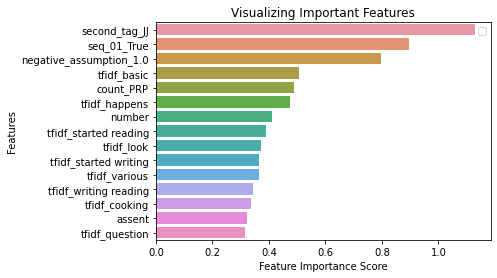

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
# #Create a Gaussian Classifier
# clf=RandomForestClassifier()
# # RandomForestClassifier()
# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(features,y_train)
# y_pred=clf.predict(features2)
# print(classification_report(y_test,y_pred))
import pandas as pd
feature_imp = pd.Series(svc.coef_[0], index=features.columns).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15],orient='h')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Logistic Regression score is 52.87356321839081% 

Support Vector Classifier score is 53.44827586206896%

Decision Tree Classifier score is 45.97701149425287%

Random Forest Classifier score is 54.02298850574713%

KNN Classifier score is 51.724137931034484% with k = 1
KNN Classifier score is 54.59770114942529% with k = 2
KNN Classifier score is 57.47126436781609% with k = 3
KNN Classifier score is 53.44827586206896% with k = 4
KNN Classifier score is 55.74712643678161% with k = 5
KNN Classifier score is 55.172413793103445% with k = 6
KNN Classifier score is 57.47126436781609% with k = 7
KNN Classifier score is 53.44827586206896% with k = 8
KNN Classifier score is 55.74712643678161% with k = 9
KNN Classifier score is 54.59770114942529% with k = 10
KNN Classifier score is 55.74712643678161% with k = 11
KNN Classifier score is 55.172413793103445% with k = 12
KNN Classifier score is 55.172413793103445% with k = 13
KNN Classifier score is 54.59770114942529% with k = 14
KNN Classifier score i

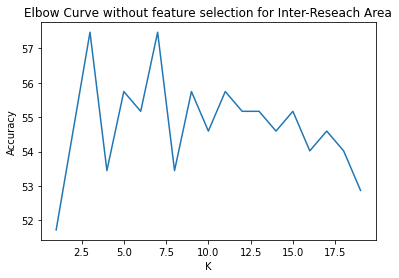


MLP Classifier score is 52.29885057471264%



In [104]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(25, 5), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [ ]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(features,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=1,p=2)
knn.fit(features,y_train)
pred = knn.predict(features2)
print(classification_report(y_test,pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test,y_pred))

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

In [ ]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

In [ ]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

In [216]:
# #Import libraries:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
# from sklearn.metrics import classification_report,roc_auc_score   #Additional scklearn functions
# # from sklearn.grid_search import GridSearchCV   #Perforing grid search
# from sklearn.model_selection import GridSearchCV


# import matplotlib.pylab as plt
# %matplotlib inline
# from matplotlib.pylab import rcParams
# # rcParams['figure.figsize'] = 12, 4

# # train = pd.read_csv('train_modified.csv')
# target = 'y'
# IDcol = 'person_id'
# def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(dtrain.values, label=y_train)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#             metrics='auc', early_stopping_rounds=early_stopping_rounds)
# #                           , show_progress=False)
#         alg.set_params(n_estimators=cvresult.shape[0])
    
#     #Fit the algorithm on the data
#     alg.fit(dtrain, y_train,eval_metric='auc')
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain)
#     dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
#     #Print model report:
#     print ("\nModel Report")
#     print ("Accuracy : %.4g" % accuracy_score(y_train, dtrain_predictions))
#     print ("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))
                    
# #     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
# #     feat_imp.plot(kind='bar', title='Feature Importances')
# #     plt.ylabel('Feature Importance Score')
# # predictors = [x for x in features.columns if x not in [target, IDcol]]
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# modelfit(xgb1, features, y_train)

In [217]:
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# xgb1.fit(features, y_train)
# # .fit(features, y_train)
# # make a single prediction
# yhat = xgb1.predict(features2)
# print(classification_report(yhat,y_test))

In [85]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 80, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [219]:
features

,tfidf_ll talk manager,tfidf_want pursue,tfidf_games,tfidf_started writing,tfidf_extremely,tfidf_mean mean,tfidf_actively,tfidf_challenge,tfidf_electronic,tfidf_situation,...,is_modal_True,count_nouns,seq_01_True,WC,get_consonant_letters,vocab_richness,get_sonant_letters,count_of_spaces,count_PRP,count_adjectives
0,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,1.0,0.202948,1.0,0.483021,0.542128,0.709293,0.440183,0.425509,0.054050,0.200697
1,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,1.0,2.067566,1.0,1.635303,1.601850,1.382637,1.474079,1.248564,0.538489,0.376155
2,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,14.529252,...,1.0,-0.083917,1.0,0.260895,0.294529,0.439955,0.440183,0.194024,0.215530,0.551613
3,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,0.0,-1.087942,0.0,-1.030215,-1.002888,-1.086291,-1.001006,-1.014838,-1.076307,-1.027510
4,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,1.0,-0.944510,1.0,-0.447133,-0.497786,-0.682285,-0.515388,-0.448988,0.538489,-0.676594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,1.0,0.776676,1.0,1.177167,1.156173,1.247968,1.207773,1.300005,1.507366,0.727071
719,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,1.0,-0.370781,1.0,-0.044529,-0.081821,0.035949,-0.076765,0.091142,0.699968,-0.150219
720,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,0.0,-0.801078,1.0,-0.433250,-0.497786,-0.457837,-0.374402,-0.448988,0.215530,-0.501136
721,-0.067687,-0.089346,-0.102956,-0.097211,-0.086166,-0.072096,-0.072229,-0.072305,-0.072402,-0.072678,...,0.0,-0.944510,0.0,-1.016332,-1.012791,-1.131181,-1.001006,-0.989118,-0.914828,-1.027510


In [215]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.49      0.56      0.52        77
         1.0       0.61      0.55      0.58        97

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.56      0.55      0.55       174



In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
parameters = {
    'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [86]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


In [87]:
grid_search.fit(features.to_numpy(),y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[11:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [247]:
grid_search.fit(features, y_train)

OSError: [Errno 22] Invalid argument

# Models chi

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [92]:
features = X_train[chi_feature]
features2 = X_test[chi_feature]

In [93]:
features.isna().sum().sum()

0

In [94]:
X_test.isna().sum().sum()

0

In [95]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.82      0.54      0.65        69
           1       0.24      0.56      0.33        18

    accuracy                           0.54        87
   macro avg       0.53      0.55      0.49        87
weighted avg       0.70      0.54      0.58        87



In [96]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.71      0.59        45
         1.0       0.43      0.24      0.31        42

    accuracy                           0.48        87
   macro avg       0.47      0.47      0.45        87
weighted avg       0.47      0.48      0.45        87



In [97]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.65 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.64 (+/- 0.03) [KNNClassifier]
Accuracy: 0.66 (+/- 0.03) [SVC]
Accuracy: 0.68 (+/- 0.03) [voting]


Logistic Regression score is 51.724137931034484% 

Support Vector Classifier score is 51.724137931034484%

Decision Tree Classifier score is 50.57471264367817%

Random Forest Classifier score is 52.87356321839081%

KNN Classifier score is 51.724137931034484% with k = 1
KNN Classifier score is 52.87356321839081% with k = 2
KNN Classifier score is 52.87356321839081% with k = 3
KNN Classifier score is 56.32183908045977% with k = 4
KNN Classifier score is 54.02298850574713% with k = 5
KNN Classifier score is 55.172413793103445% with k = 6
KNN Classifier score is 54.02298850574713% with k = 7
KNN Classifier score is 55.172413793103445% with k = 8
KNN Classifier score is 54.02298850574713% with k = 9
KNN Classifier score is 57.47126436781609% with k = 10
KNN Classifier score is 56.32183908045977% with k = 11
KNN Classifier score is 54.02298850574713% with k = 12
KNN Classifier score is 55.172413793103445% with k = 13
KNN Classifier score is 57.47126436781609% with k = 14
KNN Classifier score

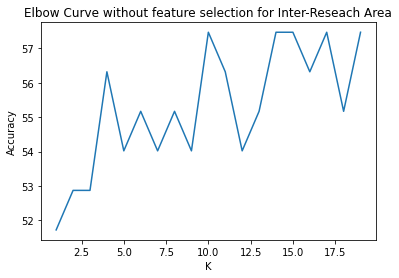


MLP Classifier score is 52.87356321839081%



In [98]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test,y_pred))

Number of mislabeled points out of a total 87 points : 40
              precision    recall  f1-score   support

         0.0       0.54      0.84      0.66        45
         1.0       0.56      0.21      0.31        42

    accuracy                           0.54        87
   macro avg       0.55      0.53      0.48        87
weighted avg       0.55      0.54      0.49        87



In [102]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63        66
         1.0       0.26      0.52      0.35        21

    accuracy                           0.53        87
   macro avg       0.52      0.53      0.49        87
weighted avg       0.65      0.53      0.56        87



In [103]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.07      0.75      0.12         4
         1.0       0.98      0.49      0.66        83

    accuracy                           0.51        87
   macro avg       0.52      0.62      0.39        87
weighted avg       0.93      0.51      0.63        87



In [104]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

[13:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.87      0.55      0.67        71
         1.0       0.24      0.62      0.34        16

    accuracy                           0.56        87
   macro avg       0.55      0.59      0.51        87
weighted avg       0.75      0.56      0.61        87



In [105]:
# lightgbm for classification
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.07      0.75      0.12         4
         1.0       0.98      0.49      0.66        83

    accuracy                           0.51        87
   macro avg       0.52      0.62      0.39        87
weighted avg       0.93      0.51      0.63        87



# Models rfe features

In [134]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [152]:
features = X_train[rfe_feature]
features2 = X_test[rfe_feature]

In [153]:
features.isna().sum().sum()

0

In [154]:
X_test.isna().sum().sum()

0

In [138]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.64      0.49      0.56        59
           1       0.29      0.43      0.34        28

    accuracy                           0.47        87
   macro avg       0.47      0.46      0.45        87
weighted avg       0.53      0.47      0.49        87



In [139]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60        45
         1.0       0.54      0.45      0.49        42

    accuracy                           0.55        87
   macro avg       0.55      0.55      0.55        87
weighted avg       0.55      0.55      0.55        87



In [140]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.62 (+/- 0.02) [DecisionTreeClassifier]
Accuracy: 0.68 (+/- 0.03) [KNNClassifier]
Accuracy: 0.72 (+/- 0.03) [SVC]
Accuracy: 0.65 (+/- 0.03) [voting]


In [155]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")
print(classification_report(y_test,predictionsSVC))

Support Vector Classifier score is 55.172413793103445%

              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60        45
         1.0       0.54      0.45      0.49        42

    accuracy                           0.55        87
   macro avg       0.55      0.55      0.55        87
weighted avg       0.55      0.55      0.55        87



Logistic Regression score is 55.172413793103445% 

Support Vector Classifier score is 55.172413793103445%

Decision Tree Classifier score is 51.724137931034484%

Random Forest Classifier score is 48.275862068965516%

KNN Classifier score is 44.827586206896555% with k = 1
KNN Classifier score is 45.97701149425287% with k = 2
KNN Classifier score is 45.97701149425287% with k = 3
KNN Classifier score is 51.724137931034484% with k = 4
KNN Classifier score is 50.57471264367817% with k = 5
KNN Classifier score is 51.724137931034484% with k = 6
KNN Classifier score is 45.97701149425287% with k = 7
KNN Classifier score is 43.67816091954023% with k = 8
KNN Classifier score is 44.827586206896555% with k = 9
KNN Classifier score is 44.827586206896555% with k = 10
KNN Classifier score is 44.827586206896555% with k = 11
KNN Classifier score is 44.827586206896555% with k = 12
KNN Classifier score is 44.827586206896555% with k = 13
KNN Classifier score is 49.42528735632184% with k = 14
KNN Classifier

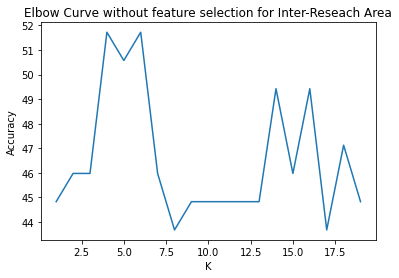


MLP Classifier score is 49.42528735632184%



In [141]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [147]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 38


In [148]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.55      0.67        71
         1.0       0.24      0.62      0.34        16

    accuracy                           0.56        87
   macro avg       0.55      0.59      0.51        87
weighted avg       0.75      0.56      0.61        87



In [143]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60        51
         1.0       0.48      0.56      0.51        36

    accuracy                           0.56        87
   macro avg       0.56      0.56      0.56        87
weighted avg       0.57      0.56      0.57        87



In [144]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.58      0.50      0.54        52
         1.0       0.38      0.46      0.42        35

    accuracy                           0.48        87
   macro avg       0.48      0.48      0.48        87
weighted avg       0.50      0.48      0.49        87



In [145]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

[11:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.56      0.52      0.54        48
         1.0       0.45      0.49      0.47        39

    accuracy                           0.51        87
   macro avg       0.50      0.50      0.50        87
weighted avg       0.51      0.51      0.51        87



In [146]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.56      0.48      0.52        52
         1.0       0.36      0.43      0.39        35

    accuracy                           0.46        87
   macro avg       0.46      0.45      0.45        87
weighted avg       0.48      0.46      0.46        87



# Models embed

In [266]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [267]:
features = X_train[embeded_lr_feature]
features2 = X_test[embeded_lr_feature]

In [268]:
features.isna().sum().sum()

0

In [269]:
X_test.isna().sum().sum()

0

In [270]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.40      0.55      0.46        64
           1       0.67      0.53      0.59       110

    accuracy                           0.53       174
   macro avg       0.53      0.54      0.53       174
weighted avg       0.57      0.53      0.54       174



In [271]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.37      0.43        87
         1.0       0.51      0.66      0.57        87

    accuracy                           0.51       174
   macro avg       0.51      0.51      0.50       174
weighted avg       0.51      0.51      0.50       174



In [272]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.55 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.55 (+/- 0.04) [KNNClassifier]
Accuracy: 0.60 (+/- 0.03) [SVC]
Accuracy: 0.56 (+/- 0.04) [voting]


Logistic Regression score is 58.620689655172406% 

Support Vector Classifier score is 57.47126436781609%

Decision Tree Classifier score is 45.97701149425287%

Random Forest Classifier score is 54.59770114942529%

KNN Classifier score is 55.172413793103445% with k = 1
KNN Classifier score is 58.04597701149425% with k = 2
KNN Classifier score is 55.172413793103445% with k = 3
KNN Classifier score is 48.275862068965516% with k = 4
KNN Classifier score is 51.14942528735632% with k = 5
KNN Classifier score is 52.29885057471264% with k = 6
KNN Classifier score is 52.87356321839081% with k = 7
KNN Classifier score is 55.172413793103445% with k = 8
KNN Classifier score is 53.44827586206896% with k = 9
KNN Classifier score is 52.29885057471264% with k = 10
KNN Classifier score is 51.14942528735632% with k = 11
KNN Classifier score is 54.02298850574713% with k = 12
KNN Classifier score is 48.85057471264368% with k = 13
KNN Classifier score is 52.29885057471264% with k = 14
KNN Classifier score 

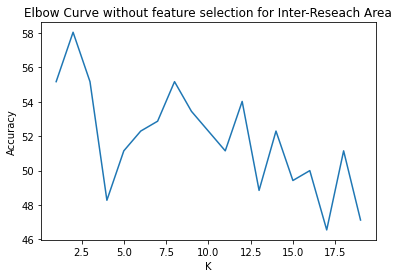


MLP Classifier score is 63.793103448275865%



In [283]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(15,5), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [274]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 174 points : 85


In [275]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.41      0.49      0.45        73
         1.0       0.57      0.50      0.53       101

    accuracy                           0.49       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.51      0.49      0.50       174



In [277]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.45      0.51      0.48        76
         1.0       0.57      0.51      0.54        98

    accuracy                           0.51       174
   macro avg       0.51      0.51      0.51       174
weighted avg       0.52      0.51      0.51       174



In [278]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

[16:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.43      0.51      0.46        73
         1.0       0.59      0.50      0.54       101

    accuracy                           0.51       174
   macro avg       0.51      0.51      0.50       174
weighted avg       0.52      0.51      0.51       174



In [279]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       0.43      0.49      0.46        75
         1.0       0.56      0.49      0.53        99

    accuracy                           0.49       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.50      0.49      0.50       174



# Models embed rf

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
features = X_train[embeded_rf_feature]
features2 = X_test[embeded_rf_feature]

In [20]:
features.isna().sum().sum()

0

In [21]:
X_test.isna().sum().sum()

0

In [24]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.22      0.42      0.29        24
           1       0.67      0.44      0.53        63

    accuracy                           0.44        87
   macro avg       0.44      0.43      0.41        87
weighted avg       0.54      0.44      0.47        87



In [25]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.20      0.28        45
           1       0.47      0.76      0.58        42

    accuracy                           0.47        87
   macro avg       0.47      0.48      0.43        87
weighted avg       0.47      0.47      0.43        87



In [26]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.01) [DecisionTreeClassifier]
Accuracy: 0.52 (+/- 0.03) [KNNClassifier]
Accuracy: 0.55 (+/- 0.02) [SVC]
Accuracy: 0.53 (+/- 0.04) [voting]


Logistic Regression score is 49.42528735632184% 

Support Vector Classifier score is 52.87356321839081%

Decision Tree Classifier score is 47.12643678160919%

Random Forest Classifier score is 51.724137931034484%

KNN Classifier score is 47.12643678160919% with k = 1
KNN Classifier score is 44.827586206896555% with k = 2
KNN Classifier score is 47.12643678160919% with k = 3
KNN Classifier score is 47.12643678160919% with k = 4
KNN Classifier score is 50.57471264367817% with k = 5
KNN Classifier score is 45.97701149425287% with k = 6
KNN Classifier score is 52.87356321839081% with k = 7
KNN Classifier score is 51.724137931034484% with k = 8
KNN Classifier score is 54.02298850574713% with k = 9
KNN Classifier score is 52.87356321839081% with k = 10
KNN Classifier score is 51.724137931034484% with k = 11
KNN Classifier score is 51.724137931034484% with k = 12
KNN Classifier score is 54.02298850574713% with k = 13
KNN Classifier score is 54.02298850574713% with k = 14
KNN Classifier score 

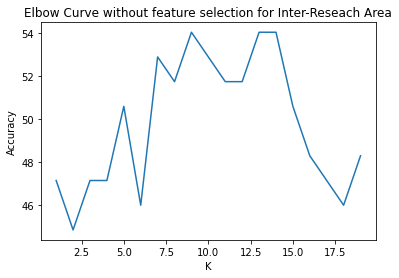


MLP Classifier score is 47.12643678160919%



In [27]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(classification_report(y_test,y_pred))

Number of mislabeled points out of a total 87 points : 48
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        45
           1       0.41      0.31      0.35        42

    accuracy                           0.45        87
   macro avg       0.44      0.44      0.44        87
weighted avg       0.44      0.45      0.44        87



In [29]:
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.56      0.42        27
           1       0.71      0.50      0.59        60

    accuracy                           0.52        87
   macro avg       0.52      0.53      0.50        87
weighted avg       0.60      0.52      0.53        87



In [31]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.16      0.54      0.24        13
           1       0.86      0.49      0.62        74

    accuracy                           0.49        87
   macro avg       0.51      0.51      0.43        87
weighted avg       0.75      0.49      0.56        87



In [32]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

ValueError: ignored

In [33]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.58      0.42        26
           1       0.74      0.51      0.60        61

    accuracy                           0.53        87
   macro avg       0.54      0.54      0.51        87
weighted avg       0.62      0.53      0.55        87



# Models lgbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



import warnings
warnings.filterwarnings('ignore')

In [ ]:
features = X_train[embeded_lgb_feature]
features2 = X_test[embeded_lgb_feature]

In [ ]:
features.isna().sum().sum()

0

In [ ]:
X_test.isna().sum().sum()

0

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier()
# scores = cross_val_score(clf, features, y_train, cv=5)
# print(scores.mean())
clf.fit(features, y_train)
y_pred = (clf.predict(features2)>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.31      0.52      0.39        27
           1       0.69      0.48      0.57        60

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.48        87
weighted avg       0.57      0.49      0.51        87



In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(gamma='auto')
svclassifier.fit(features, y_train)
y_pred = svclassifier.predict(features2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29        45
           1       0.49      0.81      0.61        42

    accuracy                           0.49        87
   macro avg       0.51      0.50      0.45        87
weighted avg       0.51      0.49      0.44        87



In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1 = clf1.fit(features, y_train)
clf2 = clf2.fit(features, y_train)
clf3 = clf3.fit(features, y_train)
eclf = eclf.fit(features, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'KNNClassifier', 'SVC', 'voting']):
    scores = cross_val_score(clf, features, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.04) [DecisionTreeClassifier]
Accuracy: 0.54 (+/- 0.01) [KNNClassifier]
Accuracy: 0.59 (+/- 0.02) [SVC]
Accuracy: 0.53 (+/- 0.04) [voting]


Logistic Regression score is 56.32183908045977% 

Support Vector Classifier score is 55.172413793103445%

Decision Tree Classifier score is 47.12643678160919%

Random Forest Classifier score is 48.275862068965516%

KNN Classifier score is 48.275862068965516% with k = 1
KNN Classifier score is 49.42528735632184% with k = 2
KNN Classifier score is 44.827586206896555% with k = 3
KNN Classifier score is 42.5287356321839% with k = 4
KNN Classifier score is 45.97701149425287% with k = 5
KNN Classifier score is 42.5287356321839% with k = 6
KNN Classifier score is 51.724137931034484% with k = 7
KNN Classifier score is 49.42528735632184% with k = 8
KNN Classifier score is 49.42528735632184% with k = 9
KNN Classifier score is 51.724137931034484% with k = 10
KNN Classifier score is 50.57471264367817% with k = 11
KNN Classifier score is 44.827586206896555% with k = 12
KNN Classifier score is 45.97701149425287% with k = 13
KNN Classifier score is 48.275862068965516% with k = 14
KNN Classifier score

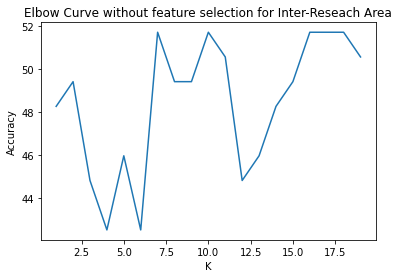


MLP Classifier score is 50.57471264367817%



In [ ]:
# fitting logistic regression
lr = LogisticRegression()
lr.fit(features, y_train)
predictionsLR = lr.predict(features2)
scoreLR = accuracy_score(y_test, predictionsLR)
print(f"Logistic Regression score is {scoreLR * 100}% \n")

# fitting SVC
svc = svm.LinearSVC()
svc.fit(features, y_train)
predictionsSVC = svc.predict(features2)
scoreSVC = accuracy_score(y_test, predictionsSVC)
print(f"Support Vector Classifier score is {scoreSVC * 100}%\n")

# fitting decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(features, y_train)
predictionsTree = clf.predict(features2)
scoreTree = accuracy_score(y_test, predictionsTree)
print(f"Decision Tree Classifier score is {scoreTree * 100}%\n")

# fitting Random Forest classifier
clf1 = RandomForestClassifier(max_features=23)
clf1.fit(features, y_train)
predictionsTree1 = clf1.predict(features2)
scoreTree1 = accuracy_score(y_test, predictionsTree1)
print(f"Random Forest Classifier score is {scoreTree1 * 100}%\n")

# fitting XGBoost
# xgb = XGBClassifier()
# xgb.fit(features.to_numpy(), y_train)
# predictionsXGB = xgb.predict(X_test)
# predictionsXGB = (predictionsXGB>0.5).astype(int)
# scoreXGB = accuracy_score(y_test, predictionsXGB)
# print(f"XG Boost Classifier score is {scoreXGB * 100}%\n")

# fitting KNN Classifier
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, y_train)
    predictionsKNN = knn.predict(features2)
    scoreKNN = accuracy_score(y_test, predictionsKNN)
    print(f"KNN Classifier score is {scoreKNN * 100}% with k = {k}")
    acc.append(scoreKNN*100)

# Elbow plot:
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Elbow Curve without feature selection for Inter-Reseach Area")

plt.show()

# MLP / ANN
classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=1)
classifier.fit(features, y_train)
predictionsMLP = classifier.predict(features2)
scoreMLP = accuracy_score(y_test, predictionsMLP)
print(f"\nMLP Classifier score is {scoreMLP * 100}%\n")

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features, y_train).predict(features2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 87 points : 44


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(features2)

print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.29      0.52      0.37        25
           1       0.71      0.48      0.58        62

    accuracy                           0.49        87
   macro avg       0.50      0.50      0.47        87
weighted avg       0.59      0.49      0.52        87



In [ ]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = HistGradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.27      0.60      0.37        20
           1       0.81      0.51      0.62        67

    accuracy                           0.53        87
   macro avg       0.54      0.55      0.50        87
weighted avg       0.68      0.53      0.57        87



In [118]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
# model = XGBClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

[11:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.87      0.54      0.67        72
         1.0       0.21      0.60      0.32        15

    accuracy                           0.55        87
   macro avg       0.54      0.57      0.49        87
weighted avg       0.75      0.55      0.61        87



In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, features, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(features, y_train)
# make a single prediction
yhat = model.predict(features2)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.24      0.65      0.35        17
           1       0.86      0.51      0.64        70

    accuracy                           0.54        87
   macro avg       0.55      0.58      0.50        87
weighted avg       0.74      0.54      0.59        87



In [11]:
new_df

,Source (D),question,person_id,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,...,negative_assumption,outcome_question,recollection_question,hypothetical_question,O,E,C,A,N,Gender_Male
0,"So the rule is about software development, and...",1,1.0,118.0,35.18,24.88,87.71,73.27,29.50,18.64,...,0.0,1.0,0.0,0.0,19,25.000000,13.0,17,35,1
1,I believe that this role is going to expose me...,1,2.0,188.0,59.59,31.62,41.31,66.07,12.53,17.55,...,0.0,1.0,0.0,0.0,18,7.000000,6.0,6,33,1
2,"OK, yeah, so the fact that I'll be able I'll b...",1,3.0,38.0,17.17,14.62,33.36,97.58,38.00,13.16,...,0.0,1.0,0.0,0.0,12,22.000000,27.0,17,36,1
3,All. I just talked about the. So the profile t...,1,4.0,136.0,27.29,23.11,74.76,97.25,13.60,13.97,...,0.0,1.0,0.0,0.0,14,15.000000,15.0,20,41,0
4,Well it was something I was born to do. I've b...,1,5.0,53.0,34.80,12.88,98.39,99.00,7.57,3.77,...,0.0,1.0,0.0,0.0,16,17.000000,15.0,18,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,"So yeah, climb mount.",D_2,27.0,4.0,1.92,50.00,74.76,25.77,4.00,0.00,...,0.0,1.0,0.0,0.0,16,30.966667,11.0,24,38,0
893,"Yes, thank you please. It's one of my hobbies....",D_2,28.0,11.0,32.58,81.84,2.40,99.00,3.67,18.18,...,0.0,1.0,0.0,0.0,19,34.000000,18.0,25,39,1
894,Yes.,D_2,29.0,1.0,93.26,50.00,1.00,25.77,1.00,0.00,...,0.0,1.0,0.0,0.0,17,19.000000,19.0,21,35,0
895,"As a matter of fact, I have.",D_2,30.0,7.0,93.26,7.67,13.15,25.77,7.00,0.00,...,0.0,1.0,0.0,0.0,13,21.000000,17.0,20,44,0
